# Susceptibility $\chi_0$ for a non interacting electron gas


The susceptibility $\chi_0$ of a non-interacting system is given by

\begin{equation}
  \chi_0(\mathbf{q}, i\omega_n) = 
    -2\frac{1}{\beta N}\sum_{\mathbf{k}, m} 
    G_0(\mathbf{k}, i\nu_m)G_0(\mathbf{k}+\mathbf{q}, i\nu_m + i\omega_n) 
\end{equation}

where $\mathbf{q}$ and $\mathbf{k}$ are momenta and $i\omega_n$ and $i\nu_m$ are Bosonic and Fermionic Matsubara frequencies, respectively, and N the number of $\mathbf{k}$ points.

Since the equation is a convolution in both momentum and frequency space the calculation can be done in fewer operations by Fourier transforming to imaginary time $\tau$ and real space $\mathbf{r}$ for the Green's function, using fast Fourier transforms (FFT) to compute

$$
G_0(\mathbf{r}, \tau) = 
  \mathcal{F}_{\{\mathbf{k}, i\nu_m\} \rightarrow \{\mathbf{r}, \tau\}} 
  \big\{ G_0(\mathbf{k}, i\nu_n) \big\}.
$$

In real space $\mathbf{r}$ and imaginary time $\tau$ the convolution for $\chi_0$ is a simple product (since it corresponds to a simple bubble diagram with a particle-hole excitation)

$$
\chi_0(\mathbf{r},\tau) = 2 G_0(\mathbf{r},\tau)G_0(-\mathbf{r},\beta -\tau)
$$

and finally one goes back to momentum and Matsubara frequency by two more fast Fourier transforms

$$ 
  \chi_0(\mathbf{q},i\omega_n) \equiv 
  \mathcal{F}_{\{\mathbf{r},\tau\} \rightarrow \{\mathbf{q}, i\omega_n\}} 
  \big\{ \chi_0(\mathbf{r}, \tau) \big\}
$$


The goal of this notebook is to compute $\chi_0$ and study it, plot it. We will answer the following questions:

- **How many operations are saved by using fast Fourier transforms rather than evaluating the convolutions directly?**

- **At what momenta $\mathbf{q}$ does the susceptibility $\chi_0$ have a maxima at zero frequency?**

- **How is the position of that maximum related to the Fermi surface?**
   

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from triqs.plot.mpl_interface import plt, oplot

# Imports 
#from triqs.lattice import BravaisLattice, BrillouinZone
#from triqs.gf import MeshBrZone, MeshImFreq, Gf, MeshProduct
import numpy as np
from triqs.gf import *
#from math import cos, pi

## Compute the Lindhard susceptibility $\chi_0(\mathbf{q}, i\omega_n)$


In [2]:
# Reload the G0 from TPSC 1
from h5 import HDFArchive

with HDFArchive("g0_wk.h5",'r') as R:
    g0_wk = R['g0_wk']

from triqs_tprf.lattice_utils import imtime_bubble_chi0_wk
chi0_wk = 2 * imtime_bubble_chi0_wk(g0_wk, nw=100)

# Save it for later reuse
with HDFArchive("chi0_wk.h5") as R:
    R['chi0_wk'] = chi0_wk


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌┬┐┌─┐┬─┐┌─┐
 ║ ╠╦╝║║═╬╗╚═╗   │ ├─┘├┬┘├┤ 
 ╩ ╩╚═╩╚═╝╚╚═╝   ┴ ┴  ┴└─└  
Two-Particle Response Function tool-box 

beta  = 2.5
nk    = 16384
nw    = 256
norb  = 1

Approx. Memory Utilization: 0.25 GB

--> fourier_wk_to_wr
--> fourier_wr_to_tr
--> chi0_tr_from_grt_PH (bubble in tau & r)


Starting serial run at: 2023-08-22 14:54:36.189902


--> chi_wr_from_chi_tr
--> chi_wk_from_chi_wr (r->k)


## Static Lindhard susceptibility $\chi_0(\mathbf{q}, \omega=0)$

The square lattice with nearest-neighbour hopping $t$ has a property called "perfect nesting", meaning that large parts of the Fermi surface are mapped on to each other by a single momentum transfer $\mathbf{k}_{nesting}$, where $\mathbf{k}_{nesting}$ is called the "nesting vector". 

Go back to the plot of $-\frac{1}{\pi} Im G_0(\mathbf{k}, i\omega_0)$ and determine this peculiar momentum vector.

The "perfect nesting" greatly enhances the particle-hole susceptibility $\chi_0$ of the system and the static Lindhard susceptibility $\chi_0(\mathbf{q}, \omega=0)$ has a dominant peak at this momentum.

This can be seen as follows. Using the expression for the Greens function and performing the sum over Matsubara frequencies, one finds that the susceptibility (Lindhard function at $\omega=0$) takes the form

\begin{equation}
  \chi_0(\mathbf{q}, \omega=0) = 
    -2\frac{1}{\beta N}\sum_{\mathbf{k}, m} 
    G_0(\mathbf{k}, i\nu_m)G_0(\mathbf{k}+\mathbf{q}, i\nu_m)= -\frac{2}{\beta N}\sum_{\mathbf{k}}\frac{f(\epsilon(\mathbf{k}))-f(\epsilon(\mathbf{k+q}))}{\epsilon(\mathbf{k})-\epsilon(\mathbf{k+q})}.
\end{equation}

The form appears natural if we just think of the structure of perturbation theory. At $\mathbf{Q}=(\pi,\pi)$, the property of the cosine give that $\epsilon(\mathbf{k+Q})=-\epsilon(\mathbf{k})$. And since $f(-\epsilon(\mathbf{k}))=1-f(\epsilon(\mathbf{k}))$ we have

\begin{equation}
  \chi_0(\mathbf{q}=\mathbf{Q}, \omega=0) = 
    -\frac{2}{\beta N}\sum_{\mathbf{k}}\frac{\tanh(\beta\epsilon(\mathbf{k})/2)}{2\epsilon(\mathbf{k})}
\end{equation}
which diverges as $T \rightarrow 0$ (i.e. when $\beta \rightarrow \infty$).

## Plot the susceptibility

### <i class="fa fa-gear fa-x" style="color: #186391"></i> Exercise 1

Using the code to plot the spectral function in the previous notebook, 
make a color plot for the static susceptibility $\chi_0(\mathbf{q}, \omega=0)$
on a grid $[0,2\pi]^2$.

NB : The solution will also provide you with a similar 3D plot.

Greens Function  with mesh Imaginary Freq Mesh with beta = 2.5, statistic = Boson, n_iw = 199, positive_only = false, Brillouin Zone Mesh with linear dimensions (128 128 1)
 -- units = 
[[0.0490874,0,0]
 [0,0.0490874,0]
 [0,0,6.28319]]
 -- brillouin_zone: Brillouin Zone with 2 dimensions and reciprocal matrix 
[[6.28319,0,0]
 [0,6.28319,0]
 [0,0,6.28319]] and target_shape (1, 1, 1, 1): 

[[[[0.38792185+1.39461391e-16j]]]]


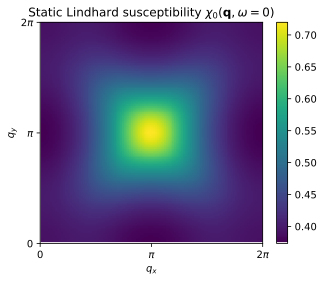

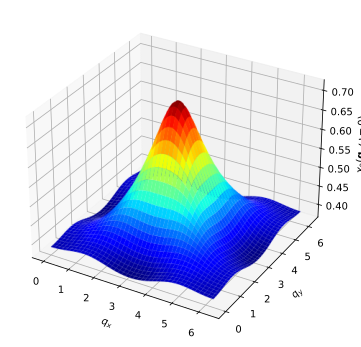

In [3]:
# Make a simple 2d grid
nq = chi0_wk.mesh[1].dims[0] + 1 # add one for ki = \pi
lsp = np.linspace(0, 2*np.pi, nq, endpoint=True)
qx, qy = np.meshgrid(lsp, lsp)

print(chi0_wk)
print(chi0_wk(0, (0., 0., 0.)))

chi = lambda qx, qy: chi0_wk(0, (qx,qy,0)).real

# 2d color plot
plt.figure(figsize=(5,4),dpi=80)
plt.pcolor(qx, qy, np.vectorize(chi)(qx,qy), rasterized=True)
plt.xlim(0, 2*np.pi); plt.ylim(0, 2*np.pi)
# decoration
plt.colorbar()
plt.xticks([0, np.pi, 2*np.pi],[r"0",r"$\pi$",r"$2\pi$"])    
plt.yticks([0, np.pi, 2*np.pi],[r"0",r"$\pi$",r"$2\pi$"])
plt.xlabel(r'$q_x$'); plt.ylabel(r'$q_y$')
plt.title('Static Lindhard susceptibility $\chi_0(\mathbf{q}, \omega=0)$')

# Here is a 3d plot. 
fig = plt.figure(figsize=(7,6))
ax  = plt.axes(projection='3d')
ax.plot_surface(qx, qy, np.vectorize(chi)(qx,qy), cmap="jet", rasterized=True)
ax.set_xlabel(r"$q_x$"); ax.set_ylabel(r"$q_y$");
ax.set_zlabel(r"$\chi_0(\mathbf{q},\omega=0)$");

### <i class="fa fa-gear fa-x" style="color: #186391"></i> Exercise 2:  Structure in Matsubara frequency $i\omega_n$

Plot the susceptibility $\chi_0(\mathbf{q}, i\omega_n)$ for $\mathbf{q}$ points from 
$(0,\pi)$ to $(\pi,\pi)$, vs $\omega_n$.

Hint : Use the partial evaluation technique shown in previous notebooks.

Does the divergence manifest itself at every frequencies ?

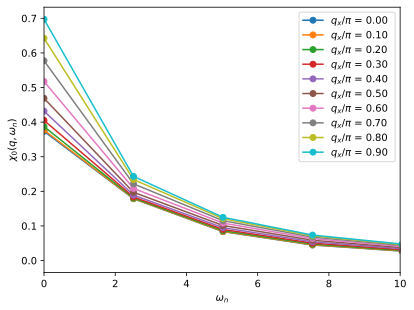

In [4]:
plt.figure(dpi=100)
for qx in np.arange(0, np.pi, np.pi/10):
    oplot(chi0_wk( all, (qx, np.pi, 0) )[0,0,0,0].real, '-o', name = r"$q_x/\pi$ = %1.2f"%(qx/np.pi))
plt.ylabel("$\chi_0(q,\omega_n)$")
plt.xlim((0,10));

### <i class="fa fa-gear fa-x" style="color: #186391"></i> Exercice 3:  Static susceptibility $\chi_0(\mathbf{q}, \omega=0)$ along high symmetry paths in the Brillouin zone

Plot the static susceptibility $\chi_0(\mathbf{q}, \omega=0)$ along the following path
in the Brillouin Zone: $\Gamma \rightarrow X \rightarrow M \rightarrow \Gamma$
where $\Gamma = (0,  0 , 0)$, $X = (\pi, \pi, 0)$ and  $M = (\pi, 0,  0)$.

What is the effect of the nesting of the Fermi surface ?

The static susceptibility along the high-symmetry path $\Gamma-X-M-\Gamma$ shows a dramatic enhancement at $\mathbf{q} = (\pi, \pi)$ due to the perfectly nested Fermi surface.

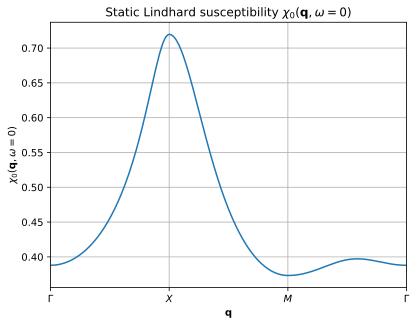

In [5]:
import itertools
n_step = 100
def path(qi, qf):   # generates a linear set of points between qi and qf
    for x in np.arange(0, 1, 1./n_step):
        yield (1-x) * np.array(qi) + x * np.array(qf) 

G = (0,  0 , 0)
X = (np.pi, np.pi, 0) 
M = (np.pi, 0,  0)
    
plt.figure(dpi=100)
plt.plot([chi0_wk(0,q).flatten().real for q in itertools.chain(path(G, X), path(X, M), path(M, G) )], '-')
plt.xlim(0, 3*n_step) # window size
plt.grid()
plt.xticks([0, n_step, 2*n_step, 3*n_step],[r'$\Gamma$',r'$X$',r'$M$',r'$\Gamma$'])
plt.title('Static Lindhard susceptibility $\chi_0(\mathbf{q},\omega=0)$')
plt.xlabel(r'$\mathbf{q}$'); plt.ylabel(r'$\chi_0(\mathbf{q},\omega=0)$');